# Which GPU to use

In [1]:
multiGPU = False
whichGPU = 0
 
# Select which GPU to use
if(multiGPU):
    from keras.utils.training_utils import multi_gpu_model
else:
    import os
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    # The GPU id to use, usually either "0" or "1"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# # Do other imports now...

# Load all the functions

In [2]:
%run -i 'arena.py'

Using TensorFlow backend.


# General Parameters

In [3]:
import math

# What data to use
tableBase = '4PpKk'
convertStates = False

# Interactive (just in general if one is asked for confirmations, set to False if on autopilot over night f.x.)
askForConfirmation = False

# NN parameters
filters = [16,32,32,64,128,128,128]
filterShape = [2,2,2,2,2,2,2]
batch_size = 256
optimizer = 'Adadelta'
useBatchNorm = False
num_classes = 3
input_shape = (4,8,8)

### DON'T MODIFY BELOW ###
# Generate dataset variables
fileName = tableBase + '.hdf5'
dataSetName = tableBase + '_onlyLegal'
if not convertStates: 
    dataSetName = tableBase + '_onlyLegal_fullStates'
dataSetWdlName = tableBase + '_Wdl_onlyLegal_3Values'

# Number of Pieces
nPi =  int(dataSetName[0])
nPa = nPi - 2
nWPa = math.ceil(nPa/2)

# Experiment 0
Converge 3>4 and rnd>4

## parameters

In [4]:
%run -i 'arena.py'

# Parameters
weightsSource = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
epochs = 300
averageOver = 5
                          ############################### MODIFY
expDescrBaseName = "converge 3to4 - {} averages - {} epochs".format(averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dir
saveBengioCheckPoints = True
saveTensorboardLogs = True # save logs in ./logs dir
compareResultsDuringTraining = False
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = True
loadWeights = True 
loadCheckpointWeights = False
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = 'conv3to4'
dictFieldName = 'acc'
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
# resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
# resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
# resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
# resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [5]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, {dictFieldName:[]})
else:
    print("Save file exists...\n")
    
# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
# model, nnStr = createModel()

# load old results
results = load_obj(saveDir, resSaveFile)
# resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
# resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
# startTrainingAtLayer = len(results)
# print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
# startThisRunAt = len(resultsThisRun)
startThisRunAt = len(results[dictFieldName])
print("\nStarting/restarting TL at average {}".format(startThisRunAt))

Save file exists...

7436088
7436088
X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset

Starting/restarting TL at average 0


In [6]:
print(results)

{'acc': []}


### Train

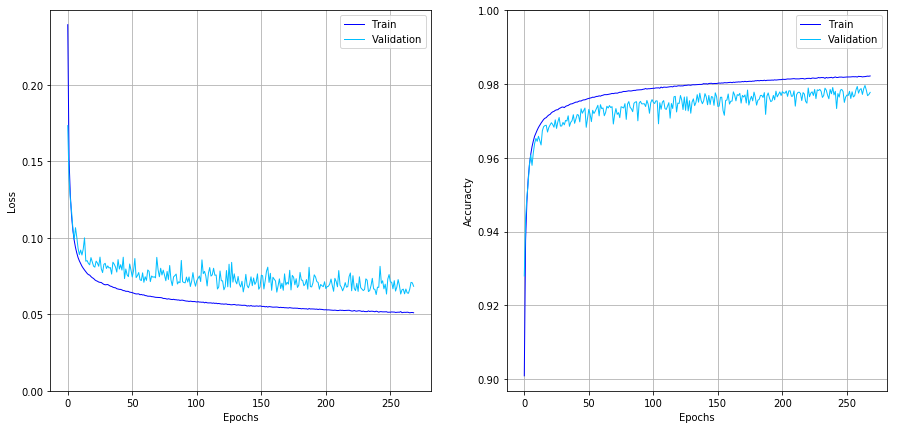

Train Accuracy of last epoch:  0.9821919248975818
Validation Accuracy of last epoch:  0.9777334947096108
Train Loss of last epoch:  0.05105114426822464
Validation Loss of last epoch:  0.0683477110675478
Epoch 270/300
2453910/2453910 [==============================] - 116s 47us/step
(4982178, 4, 8, 8)
Evaluated test loss: 0.06184070410123936
Evaluated test accuracy: 0.9796471753242784
Saving results to dir 521
Saving history...
Saving weights...
Saving figures...


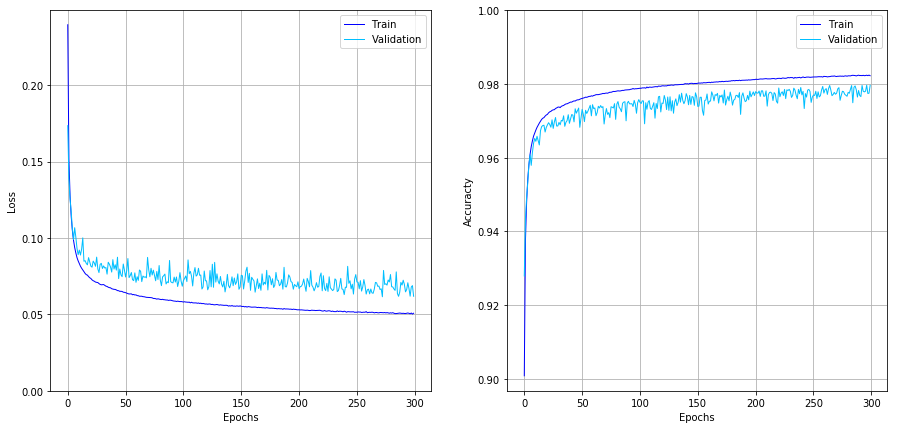

Saving summary...
Saving tensorboard logs...
All done saving stuff!


NameError: name 'saveBengioCheckPoints' is not defined

In [7]:
%run -i 'arena.py'

# train and average results
for a in range(startThisRunAt,averageOver):
    print('    ==================================================================================')
    print('    =                                                                                =')
    print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
    print('    =                                                                                =')
    print('    ==================================================================================')
    print()

    # set experement description test
#     expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
    expDescr = expDescrBaseName + '__average_{}_of_{}'.format(a+1, averageOver)

    # save current averagePosition to tmp file
    with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
        file.write('Inner avg loop position: {} out of {}'.format(a+1, averageOver))         

    # load Model layers
    # model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)
#     model, nnStr = createModel()

    # Prepare save dir
    if saveEveryRun:
        resID = genNextResultsDir(model)

    # train
    fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

    # calc score 
    score = calcScore(model)
    results[dictFieldName].append(score[1])
    if saveEveryRun:
        saveTrainResults(resID, model, logDir, score)

    # save checkpoint
    if saveBengioCheckPoints:
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())

        src = saveDir + '/' + str(resSaveFile) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)

        src = saveDir + '/' + str(resSaveFile) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)

    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))


print('\n Final Results: {}'.format(results))
print('\n Final Results Averate: {}'.format(np.mean(np.array(results[dictFieldName]))))


In [9]:
dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())

src = saveDir + '/' + str(resSaveFile) + '.pkl'
dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
if os.path.exists(src):
    shutil.move(src, dest)

src = saveDir + '/' + str(resSaveFile) + '.txt'
dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
if os.path.exists(src):
    shutil.move(src, dest)

# save results 
save_obj(saveDir, resSaveFile, results)
with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
    file.write(str(results))

# Experiment 1
Bengio methood
3n4 no freeze

## exp 1 parameters

In [ ]:
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = False                           ############################### MODIFY
epochs = 10
averageOver = 1
                          ############################### MODIFY
expDescrBaseName = "Bengio 3n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '3n4nofreeze'
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
startThisRunAt = len(resultsThisRun)
print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
    # start accumulated score from load file in case of starting from average run ≠ 0
    accumulatedScore = np.sum(resultsThisRun)
    
    # train and average results
    for a in range(startThisRunAt,averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))

    # to load:
    # results = load_obj('temp','3n4.txt')
    resultsThisRun = []
print('\n Final Results: {}'.format(results))

# Experiment 2
Bengio methood
4n4 no freeze

## exp 2 parameters

In [ ]:
%run -i 'arena.py'

# Parameters
# sourceNet = '103' # trained on 3pc from scratch
sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = False                           ############################### MODIFY
epochs = 10
averageOver = 1
                          ############################### MODIFY
expDescrBaseName = "Bengio 4n4 - freeze = {} - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '4n4nofreeze'
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
startThisRunAt = len(resultsThisRun)
print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
    # start accumulated score from load file in case of starting from average run ≠ 0
    accumulatedScore = np.sum(resultsThisRun)
    
    # train and average results
    for a in range(startThisRunAt,averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        # save checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFile, results)
        with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
            file.write(str(results))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))

    # to load:
    # results = load_obj('temp','3n4.txt')
    resultsThisRun = []
print('\n Final Results: {}'.format(results))

# Experiment 3
converging 3_8_4+

### Exp 3 Paramters

In [ ]:
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch ######################## MODIFY
freeze = False                           ############################### MODIFY
epochs = 10
averageOver = 10
                          ############################### MODIFY
expDescrBaseName = "Converging 3n4plus - average over {} runs - {} epochs".format(str(freeze), averageOver, epochs)

saveEveryRun = False # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = False # save logs in ./logs dir
resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 0.001
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False

# stuff to save in bengioResults dir
resSaveFile = '3_8_4_plus_Converge'                          ############################### MODIFY
saveDir = 'bengioResults'
resSaveFile = resSaveFile + '-{}runAverage-{}epochs'.format(averageOver, epochs)
resSaveFileFullPath = saveDir + '/' + str(resSaveFile) + '.pkl' 
resSaveFileAllRuns = resSaveFile + '-allRuns'.format(averageOver, epochs)
resSaveFileAllRunsFullPath = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl' 
resSaveFileThisRun = resSaveFile + '-thisRun'.format(averageOver, epochs)
resSaveFileThisRunFullPath = saveDir + '/' + str(resSaveFileThisRun) + '.pkl' 

### Create model and load data

In [ ]:
# prepare save file
if not os.path.exists(resSaveFileFullPath):
    print("Save file doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFile, [])
else:
    print("Save file exists...\n")
    
if not os.path.exists(resSaveFileAllRunsFullPath):
    print("Save file for all runs doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileAllRuns, [])
else:
    print("Save file for all runs exists...\n")

if not os.path.exists(resSaveFileThisRunFullPath):
    print("Save file for this run doesn't exists, creating...\n")
    save_obj(saveDir, resSaveFileThisRun, [])
else:
    print("Save file for this run exists...\n")

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)

# create model
model, nnStr = createModel()
layersCount = len(model.layers)

# load old results
results = load_obj(saveDir, resSaveFile)
resultsAllRuns = load_obj(saveDir, resSaveFileAllRuns)
resultsThisRun = load_obj(saveDir, resSaveFileThisRun)

# initialize variables wrt old results
startTrainingAtLayer = len(results)
startTrainingAtLayer = 7
print("\nStarting/restarting TL at {} transfered layers".format(startTrainingAtLayer))
startThisRunAt = len(resultsThisRun)
print("\nStarting/restarting TL at average {}".format(startTrainingAtLayer))

In [ ]:
print(results)
print(resultsThisRun)
print(resultsAllRuns)

### Train

In [ ]:
%run -i 'arena.py'

for copyFirstNLayers in range(startTrainingAtLayer, layersCount):
    print('\n\n')
    print('==========================================================================================')
    print('=                                                                                        =')
    print('=                    Currently transfering first {} layers, out of {}                      ='.format(copyFirstNLayers, layersCount - 1))
    print('=                                                                                        =')
    print('==========================================================================================')
    print()
    
    # check if we are at the flatten layer, and skip it if so
    if copyFirstNLayers == layersCount - 1:
        copyFirstNLayers += 1
        
    # train and average results
    accumulatedScore = np.sum(resultsThisRun)
#     resultsThisRun = []
    for a in range(startThisRunAt,averageOver):
        print('    ==================================================================================')
        print('    =                                                                                =')
        print('    =                Currently at run {}, out of {}                                   ='.format(a+1,averageOver))
        print('    =                                                                                =')
        print('    ==================================================================================')
        print()
        
        # set experement description test
        expDescr = expDescrBaseName + '__copyLayers_{}__average_{}_of_{}'.format(copyFirstNLayers, a+1, averageOver)
        
        # save current averagePosition to tmp file
        with open(saveDir + '/' + str(resSaveFile) + '_currentPosition.txt','w') as file:
            if copyFirstNLayers == layersCount:
                location = copyFirstNLayers - 1
            else:
                location = copyFirstNLayers 
            file.write('Layers Transfered: {} out of {} \nInner avg loop position: {} out of {}'.format(location, layersCount-1, a+1, averageOver))         
            
        # load Model layers
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        # Prepare save dir
        if saveEveryRun:
            resID = genNextResultsDir(model)

        # train
        fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

        # score and save results
        score = calcScore(model)
        if saveEveryRun:
            saveTrainResults(resID, model, logDir, score, copyFirstNLayers)

        # update Return
        accumulatedScore += score[1]
        resultsThisRun.append(score[1])
        
        
        # save checkpoint
        dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
        
        src = saveDir + '/' + str(resSaveFileThisRun) + '.pkl'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.pkl'
        if os.path.exists(src):
            shutil.move(src, dest)
            
        src = saveDir + '/' + str(resSaveFileThisRun) + '.txt'
        dest = saveDir + '/checkpoints/' + str(resSaveFileThisRun) + dateTime + '.txt'
        if os.path.exists(src):
            shutil.move(src, dest)
        
        # save results 
        save_obj(saveDir, resSaveFileThisRun, resultsThisRun)
        with open(saveDir + '/' + str(resSaveFileThisRun) + '.txt','w') as file:
            file.write(str(resultsThisRun))
            
    # append averaged results for one set of layers
    results.append(accumulatedScore/averageOver)
    resultsAllRuns.append(resultsThisRun)

    # save old results to checkpoints dir
    dateTime = time.strftime('%Y-%m-%d-%H:%M:%S', time.localtime())
    
    src = saveDir + '/' + str(resSaveFile) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFile) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFile) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)

    src = saveDir + '/' + str(resSaveFileAllRuns) + '.txt'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.txt'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    src = saveDir + '/' + str(resSaveFileAllRuns) + '.pkl'
    dest = saveDir + '/checkpoints/' + str(resSaveFileAllRuns) + dateTime + '.pkl'
    if os.path.exists(src):
        shutil.move(src, dest)
        
    # save results 
    save_obj(saveDir, resSaveFile, results)
    with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
        file.write(str(results))
    
    save_obj(saveDir, resSaveFileAllRuns, resultsAllRuns)
    with open(saveDir + '/' + str(resSaveFileAllRuns) + '.txt','w') as file:
        file.write(str(resultsAllRuns))

    # to load:
    # results = load_obj('temp','3n4.txt')
    resultsThisRun = []
print('\n Final Results: {}'.format(results))

In [ ]:
resultsThisRun
# save_ob('.','x',resultsThisRun)

# Experiment 0
test batch size vs time vs validation valley location

### Exp 0 Paramters

%run -i 'arena.py'

# Parameters
weightsSource = '103' # trained on 3pc from scratch
# sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch
# freeze = False
epochs = 350
expDescrBaseName = "Batch size test"

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = False # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
# resID = '---NORESID---' # used when not saving data, but fitModel() still needs a resID

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
loadCheckpointWeights = False
askForConfirmation = False

### Create model and load data

# load data
X_train, X_test, y_train, y_test = loadData(randomState = None)



### Train

%run -i 'arena.py'

batches = [128, 1024]
for batch_size in batches:
    
    expDescr = expDescrBaseName + '_batchSize{}'.format(batch_size)
    
    # create model
    model, nnStr = createModel()

    # Prepare save dir
    if saveEveryRun:
        resID = genNextResultsDir(model)
        
    # train
    fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)
        
    # score and save results
    score = calcScore(model)
    if saveEveryRun:
        saveTrainResults(resID, model, logDir, score)